# Bagging & Boosting KNN & Stacking

1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

  -> The fundamental idea of ensemble techniques is to combine multiple models to improve overall performance, and they do this by reducing the bias or variance of a single model. Bagging builds independent models in parallel on random data subsets to reduce variance, while boosting builds models sequentially, with each new model focusing on correcting the errors of the previous ones to reduce bias.
 ## **Bagging vs. Boosting**

###**Bagging (e.g., Random Forests)**  
  **Approach**
  
  Trains models in parallel on different random subsets of the data.

**Objective**

To reduce variance and prevent overfitting.

**Model Weight**

All models typically have equal weight.

###**Boosting (e.g., Gradient Boosting)**
**Approach**

Trains models sequentially, with each new model correcting the errors of
the previous ones.

**Objective**

To reduce bias by focusing on difficult-to-classify examples.

**Model Weight**

Models are weighted by performance, with more weight given to models that performed better.

2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

  -> Random Forest reduces overfitting compared to a single decision tree by employing an ensemble method known as bagging (Bootstrap Aggregating) and introducing randomness in feature selection.

- **Bagging:** Instead of building one deep, complex decision tree that might overfit to the training data, Random Forest constructs multiple (e.g., hundreds) individual decision trees. Each tree is trained on a different bootstrap sample of the original data (random sampling with replacement). This introduces diversity among the trees, as each sees a slightly different subset of the data, making them less likely to capture specific noise in the training set. The final prediction is then determined by combining the predictions of all individual trees (e.g., majority voting for classification), which averages out the errors and reduces variance.
- **Random Feature Subspace:** During the construction of each individual tree, at each split point, a random subset of features is considered for finding the best split, rather than evaluating all available features. This further decorrelates the trees, preventing them from becoming too similar and relying on the same dominant features. This added randomness strengthens the ensemble's ability to generalize to unseen data.

**Two key hyperparameters in this process are:**

- n_estimators: This hyperparameter controls the number of individual decision trees in the forest. A higher number of estimators generally leads to better performance and reduced variance, but also increases computational cost.

- max_features: This hyperparameter determines the number of features to consider when looking for the best split at each node in an individual tree. By setting max_features to a value less than the total number of features, the algorithm introduces the random feature subspace, promoting diversity and reducing overfitting.

3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

   -> Stacking is an ensemble method that uses a meta-model to learn how to best combine the predictions of multiple different base models. It differs from bagging and boosting because bagging combines similar models to reduce variance and boosting combines weak models sequentially to reduce bias, while stacking uses diverse models (like a decision tree, a support vector machine, and logistic regression) and a meta-model to create a more accurate final prediction. A simple use case is predicting house prices, where a stacking model could use a decision tree, a linear regression, and a neural network as base models, with a final logistic regression model learning to combine their outputs to make the final prediction.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

  -> The Out-of-Bag (OOB) score is a performance metric for Random Forests calculated using samples not used in the training of a specific tree. It is useful because it provides an unbiased estimate of the model's performance without needing a separate validation set, making it efficient for smaller datasets where splitting the data would reduce training data size. For each data point, the score is based on the predictions of the trees that did not see that data point during their training.

5. Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

   -> AdaBoost and Gradient Boosting are both ensemble methods that build weak learners sequentially, but they differ fundamentally in how they address errors and adjust weights.

##**AdaBoost**
###**Error Handling**
Focuses on which samples were misclassified, increasing their influence (weight) in the next iteration.
###**Weight Adjustment**
Adjusts the sample weights at each iteration and assigns a weight to the weak learner itself based on its performance.
###**Typical Use Cases**
Works well for binary classification with clean, noise-free data where interpretability is important. It is highly sensitive to outliers.
##**Gradient Boosting**
###**Error Handling**
Focuses on how much error was made, fitting the next learner to the residual errors (pseudo-residuals) of the previous model.
###**Weight Adjustment**
Does not change sample weights; instead, it uses a gradient descent procedure to fit new models to the negative gradient of the loss function (residuals).
###**Typical Use Cases**
Offers more flexibility and better performance for both regression and complex classification problems, even with noisy data, due to regularization and diverse loss functions.

6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost excels with categorical features due to its native, sophisticated handling mechanisms that minimize the need for manual preprocessing.
##**Handling of Categorical Variables:**

CatBoost employs a technique called Ordered Target Encoding to convert categorical features into numerical ones during training. This method addresses the problem of target leakage and prediction shift often associated with traditional target encoding by:

- Ordered Boosting: Unlike standard gradient boosting, CatBoost uses ordered boosting, where the calculation of residuals for a specific data point only considers data points before it in a randomly permuted order. This prevents the model from "cheating" by using target information from future data.
- Permutation-Driven Encoding: For each categorical feature, CatBoost generates multiple random permutations of the dataset. For each data point within a permutation, the categorical value is replaced by the average of the target values of all preceding data points in that specific permutation. This process is repeated across permutations, and the final encoding is an average of these results, making the encoding robust and less prone to overfitting.
7. KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
    1. Load the Wine dataset (sklearn.datasets.load_wine()).
    2. Split data into 70% train and 30% test.
    3. Train a KNN classifier (default K=5) without scaling and evaluate using:
         
         a. Accuracy
         
         b. Precision, Recall, F1-Score (print classification report)
    4. Apply StandardScaler, retrain KNN, and compare metrics.
    5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
    6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN (K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Evaluate unscaled model
print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification Report:")
print(classification_report(y_test, y_pred_default))

# 4. Apply StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate scaled model
print("\n=== KNN With StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:")
print(classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for best K (1–20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Train optimized KNN
best_knn = grid_search.best_estimator_
y_pred_optimized = best_knn.predict(X_test_scaled)

# Evaluate optimized model
print("\n=== Optimized KNN (After GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))


=== KNN Without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN With StandardScaler ===
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', 'n_

8. PCA + KNN with Variance Analysis and Visualization
Task:
    1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
    2. Apply PCA and plot the scree plot (explained variance ratio).
    3. Retain 95% variance and transform the dataset.
    4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
    5. Visualize the first two principal components using a scatter plot (color by class).

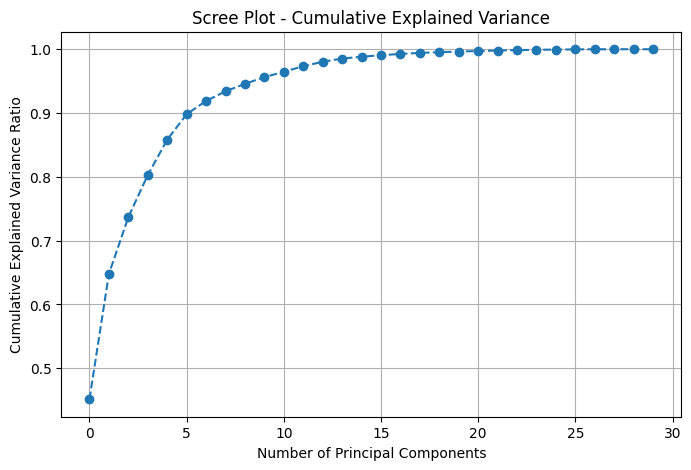

Number of components to retain 95% variance: 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9591
PCA (95% variance) Accuracy: 0.9532

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Classification Report (PCA Data):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



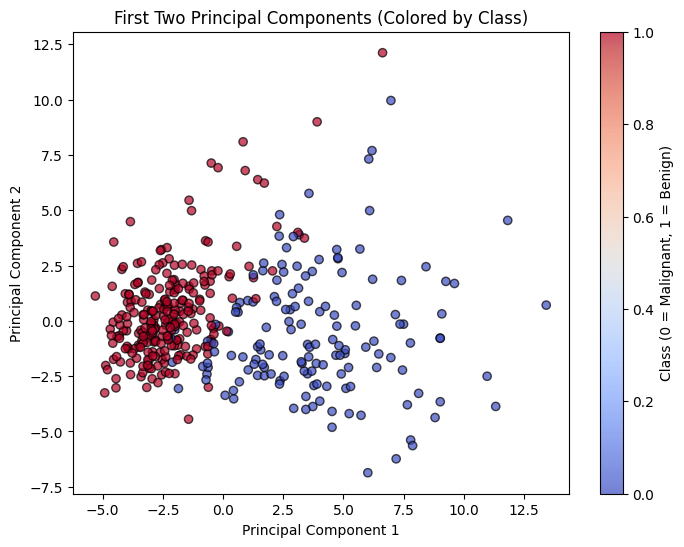

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data (important before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# 4. Train KNN on original and PCA-transformed data

# KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

# KNN on PCA Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Compare Results
print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA (95% variance) Accuracy: {acc_pca:.4f}")

# Classification reports (optional for detail)
print("\nClassification Report (Original Data):")
print(classification_report(y_test, y_pred_original))
print("\nClassification Report (PCA Data):")
print(classification_report(y_test, y_pred_pca))

# 5. Visualization: First Two Principal Components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("First Two Principal Components (Colored by Class)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
    1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
    2. Train a KNN regressor with:
         
         a. Euclidean distance (K=5)
         
         b. Manhattan distance (K=5)
         
         c. Compare Mean Squared Error (MSE) for both.
    3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

=== KNN Regressor Comparison (K=5) ===
Euclidean Distance MSE: 4837.0363
Manhattan Distance MSE: 5428.5875


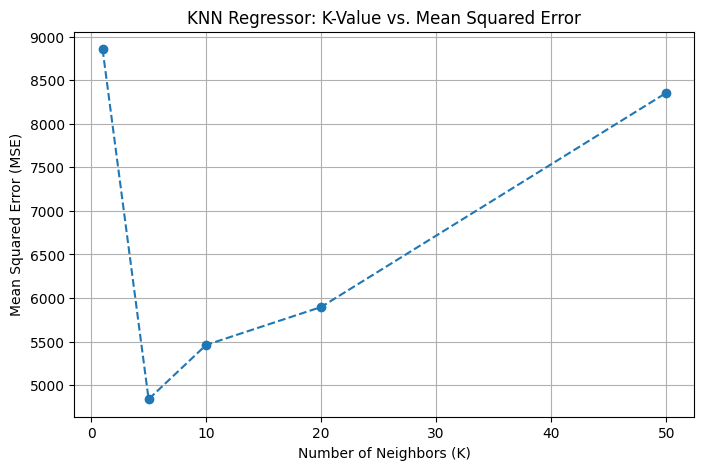

K=1: MSE=8857.0895
K=5: MSE=4837.0363
K=10: MSE=5460.1411
K=20: MSE=5896.1427
K=50: MSE=8355.6141


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling improves KNN performance (distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN regressors (K=5) with different distance metrics

# a. Euclidean distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Compare
print("=== KNN Regressor Comparison (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# 3. Test multiple K values and analyze bias-variance tradeoff
K_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(K_values, mse_scores, marker='o', linestyle='--')
plt.title("KNN Regressor: K-Value vs. Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# Display results
for k, mse in zip(K_values, mse_scores):
    print(f"K={k}: MSE={mse:.4f}")


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
      1. Load the Pima Indians Diabetes dataset (contains missing values).
      2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
      3. Train KNN using:
          
           a. Brute-force method
          
           b. KD-Tree
          
           c. Ball Tree
      4. Compare their training time and accuracy.
      5. Plot the decision boundary for the best-performing method (use 2 most important
features).


Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== BRUTE ===
Accuracy: 0.7446
Training Time: 0.0016 sec
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       150
         1.0       0.66      0.56      0.60        81

    accuracy                           0.74       231
   

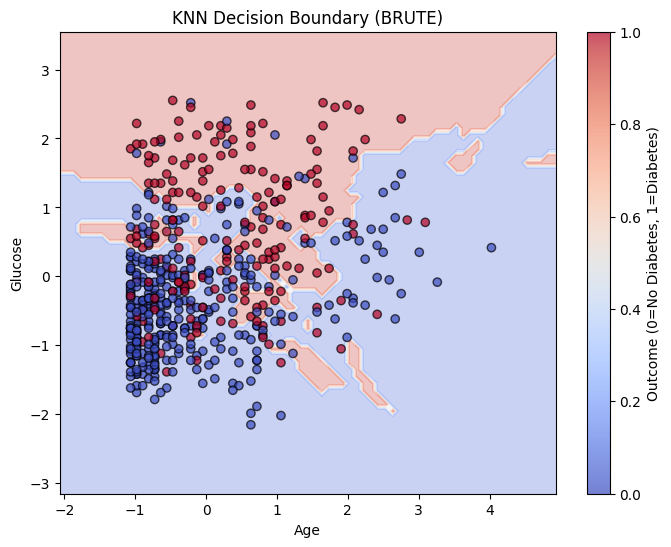

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

# 1. Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

print("Dataset Shape:", data.shape)
print(data.head())

# 2. Handle missing values using KNN Imputer
# Replace 0s in certain medical features with NaN (these cannot be zero physiologically)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Impute using KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split features and target
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'accuracy': acc, 'time': train_time}
    print(f"\n=== {algo.upper()} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} sec")
    print(classification_report(y_test, y_pred))

# 4. Compare algorithms
results_df = pd.DataFrame(results).T
print("\n=== Comparison Summary ===")
print(results_df)

# 5. Decision boundary for best-performing method
best_algo = results_df['accuracy'].idxmax()
print(f"\nBest Algorithm: {best_algo.upper()}")

# Identify two most important features (using permutation importance)
best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X_train_scaled, y_train)
importances = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get top 2 feature indices
top2_idx = np.argsort(importances.importances_mean)[-2:]
top2_features = X.columns[top2_idx]
print("Top 2 Important Features:", top2_features.tolist())

# Extract 2D data for visualization
X_train_2d = X_train_scaled[:, top2_idx]
X_test_2d = X_test_scaled[:, top2_idx]

# Retrain model on 2D data for plotting
knn_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_2d.fit(X_train_2d, y_train)

# Create meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', alpha=0.7)
plt.title(f"KNN Decision Boundary ({best_algo.upper()})")
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.colorbar(label='Outcome (0=No Diabetes, 1=Diabetes)')
plt.show()
